## Dog and Cat Image Classification Problem

In [ ]:
# Download data  
# https://www.kaggle.com/c/dogs-vs-cats/data?select=train.zip

In [1]:
ls

 Volume in drive C is Windows8_OS
 Volume Serial Number is D077-941D

 Directory of C:\Users\TOYIN OLAPE\Documents\Stutern\Tasks\Stutern_Projects\Supervised_Projects\dog_cat

2021-02-03  07:33 PM    <DIR>          .
2021-02-03  07:33 PM    <DIR>          ..
2021-02-01  11:44 PM    <DIR>          .ipynb_checkpoints
2021-02-02  08:38 AM             1,888 app.py
2021-02-03  08:30 PM    <DIR>          dataset
2021-02-02  12:01 AM               202 Dockfile
2021-02-03  07:33 PM           444,613 dog_cat.ipynb
2021-02-02  10:58 AM    <DIR>          intro
2021-02-02  07:10 PM    <DIR>          model
2021-02-01  06:38 PM    <DIR>          static
2021-02-01  06:37 PM    <DIR>          templates
               3 File(s)        446,703 bytes
               8 Dir(s)  13,914,767,360 bytes free


In [2]:
!mkdir cat && mkdir dog

In [3]:
ls

app.py  dataset/  dog/           model/   static/
cat/    Dockfile  dog_cat.ipynb  output/  templates/


In [8]:
cd dog_cat/

/home/george/Documents/stutern/dog_cat


In [4]:
!find dataset/ -iname 'cat*' -exec mv '{}' cat/ \;

find: ‘dataset/cat’: No such file or directory


In [9]:
!find dataset/ -iname 'dog*' -exec mv '{}' dog/ \;

find: ‘dataset/dog’: No such file or directory


In [ ]:
mv dog/ && cat/ 

In [13]:
mv cat/ dataset/

In [ ]:
#pip install split-folders
#pip install split-folders tqdm

In [2]:
!pip install split_folders

In [3]:
import splitfolders  # https://github.com/jfilter/split-folders
splitfolders.ratio('dataset', output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 25000 files [23:07, 18.50 files/s]


In [1]:
# Import dependencies
import matplotlib.pyplot as plt 
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
##
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
 
keras.__version__
 

ModuleNotFoundError: No module named 'keras'

In [2]:
ls 

app.py  dataset/  Dockfile  dog_cat.ipynb  model/  output/  static/  templates/


In [18]:
#Load data
train_data_path = "output/train/"
validation_data_path = "output/val/"

In [19]:
"""# Data Preprocessing"""
 
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')
 
training_data =  training_datagen.flow_from_directory(train_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')
 
training_data.class_indices
 
valid_datagen = ImageDataGenerator(rescale=1./255)
 
valid_data =  valid_datagen.flow_from_directory(validation_data_path, 
                                      target_size=(150, 150), 
                                      batch_size=32,
                                      class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


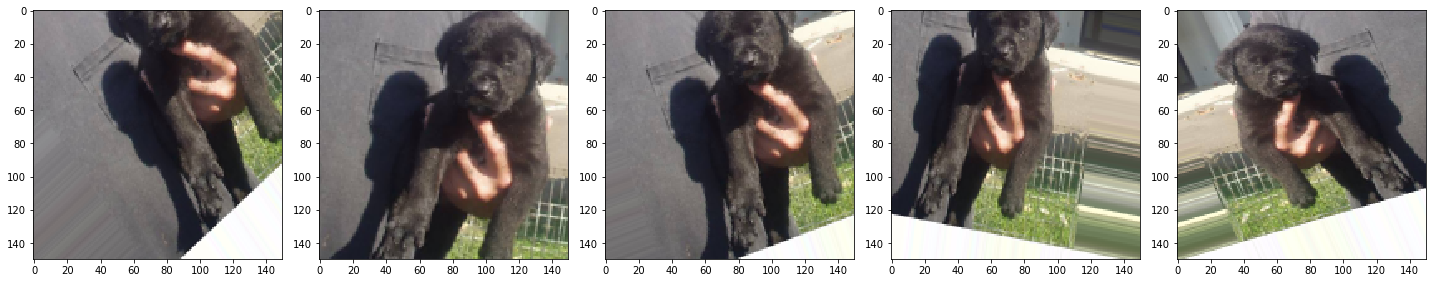

In [20]:
 def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [24]:
training_data[0][0][0].shape

(150, 150, 3)

In [25]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3],kernel_regularizer=l2(l=0.01)),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    BatchNormalization(),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    BatchNormalization(),
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                    BatchNormalization(),                                  
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [8]:
#!mkdir model

In [29]:
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
model_path = 'model/dog_or_cat_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [11]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/100
625/625 [==============================] - 123s 196ms/step - loss: 1.0786 - accuracy: 0.5527 - val_loss: 0.3532 - val_accuracy: 0.6012

Epoch 00001: val_accuracy improved from -inf to 0.60120, saving model to model/dog_or_cat_predictor_best.h5
Epoch 2/100
625/625 [==============================] - 123s 196ms/step - loss: 0.9532 - accuracy: 0.5649 - val_loss: 0.8649 - val_accuracy: 0.5964

Epoch 00002: val_accuracy did not improve from 0.60120
Epoch 3/100
625/625 [==============================] - 125s 199ms/step - loss: 0.8708 - accuracy: 0.5776 - val_loss: 0.4885 - val_accuracy: 0.6420

Epoch 00003: val_accuracy improved from 0.60120 to 0.64200, saving model to model/dog_or_cat_predictor_best.h5
Epoch 4/100
625/625 [==============================] - 124s 198ms/step - loss: 0.8198 - accuracy: 0.5836 - val_loss: 0.4632 - val_accuracy: 0.6204

Epoch 00004: val_accuracy did not improve from 0.64200
Epoch 5/100
625/625 [==============================] - 127s 204ms/step - loss: 

625/625 [==============================] - 126s 202ms/step - loss: 0.4286 - accuracy: 0.8110 - val_loss: 0.0520 - val_accuracy: 0.7056

Epoch 00038: val_accuracy did not improve from 0.85480
Epoch 39/100
625/625 [==============================] - 124s 198ms/step - loss: 0.4228 - accuracy: 0.8126 - val_loss: 0.3510 - val_accuracy: 0.8572

Epoch 00039: val_accuracy improved from 0.85480 to 0.85720, saving model to model/dog_or_cat_predictor_best.h5
Epoch 40/100
625/625 [==============================] - 126s 202ms/step - loss: 0.4245 - accuracy: 0.8109 - val_loss: 0.4887 - val_accuracy: 0.8504

Epoch 00040: val_accuracy did not improve from 0.85720
Epoch 41/100
625/625 [==============================] - 127s 204ms/step - loss: 0.4187 - accuracy: 0.8146 - val_loss: 0.6041 - val_accuracy: 0.7872

Epoch 00041: val_accuracy did not improve from 0.85720
Epoch 42/100
625/625 [==============================] - 124s 198ms/step - loss: 0.4172 - accuracy: 0.8155 - val_loss: 0.0180 - val_accuracy: 

625/625 [==============================] - 128s 205ms/step - loss: 0.3557 - accuracy: 0.8489 - val_loss: 0.7629 - val_accuracy: 0.8524

Epoch 00077: val_accuracy did not improve from 0.89480
Epoch 78/100
625/625 [==============================] - 126s 202ms/step - loss: 0.3565 - accuracy: 0.8533 - val_loss: 0.3373 - val_accuracy: 0.8764

Epoch 00078: val_accuracy did not improve from 0.89480
Epoch 79/100
625/625 [==============================] - 127s 203ms/step - loss: 0.3534 - accuracy: 0.8522 - val_loss: 0.2994 - val_accuracy: 0.8984

Epoch 00079: val_accuracy improved from 0.89480 to 0.89840, saving model to model/dog_or_cat_predictor_best.h5
Epoch 80/100
625/625 [==============================] - 127s 203ms/step - loss: 0.3681 - accuracy: 0.8421 - val_loss: 0.0492 - val_accuracy: 0.8972

Epoch 00080: val_accuracy did not improve from 0.89840
Epoch 81/100
625/625 [==============================] - 126s 202ms/step - loss: 0.3483 - accuracy: 0.8554 - val_loss: 0.4891 - val_accuracy: 

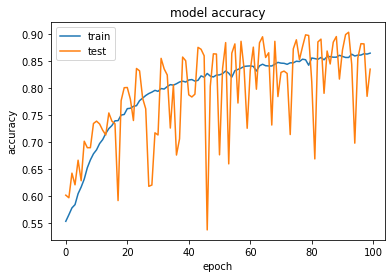

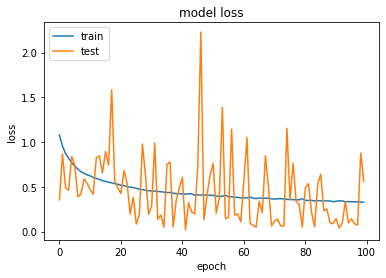

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
model_loaded = keras.models.load_model(model_path)

In [31]:
import numpy as np
from keras.preprocessing import image
 
def pred_dog_cat(model, imagefile):
    test_image = image.load_img(imagefile, target_size = (150, 150))
    test_image = image.img_to_array(test_image)/255
    print("Shape Before {}".format(test_image.shape))
    test_image = np.expand_dims(test_image, axis = 0)
    print("Shape After {}".format(test_image.shape))
 
    result = model.predict(test_image).round(3)
 
    pred = np.argmax(result)
    print(result, "--->>>", pred)
 
    if pred == 1:
        print('Predicted>>> Dog')
    else:
        print('Predicted>>> Cat')

In [33]:
pred_dog_cat(model_loaded, 'output/test/cat/cat.10018.jpg')

Shape Before (150, 150, 3)
Shape After (1, 150, 150, 3)
[[0.718 0.282]] --->>> 0
Predicted>>> Cat


In [34]:
pred_dog_cat(model_loaded, 'output/test/dog/dog.1.jpg')

Shape Before (150, 150, 3)
Shape After (1, 150, 150, 3)
[[0.139 0.861]] --->>> 1
Predicted>>> Dog


#### Training Learning

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
feature_extractor_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])